# Support Vector Regression (SVR) to Predict Total UPDRS Scores in Parkinson's Disease Patients

## Summary Statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

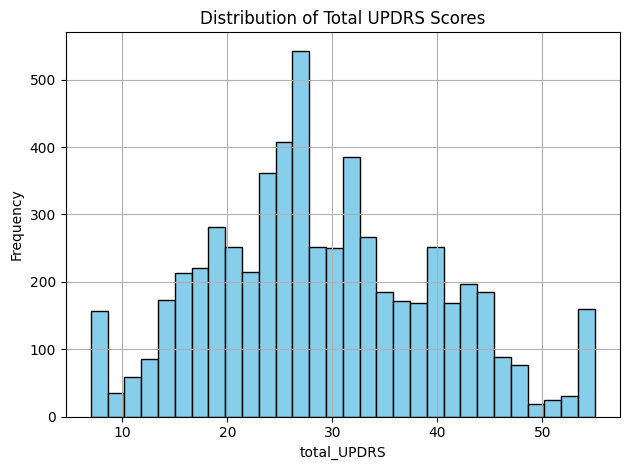


--- Numeric Summary (Mean and Std) ---
                  mean      std
age            64.8049   8.8215
test_time      92.8637  53.4456
motor_UPDRS    21.2962   8.1293
total_UPDRS    29.0189  10.7003
Jitter(%)       0.0062   0.0056
Jitter(Abs)     0.0000   0.0000
Jitter:RAP      0.0030   0.0031
Jitter:PPQ5     0.0033   0.0037
Jitter:DDP      0.0090   0.0094
Shimmer         0.0340   0.0258
Shimmer(dB)     0.3110   0.2303
Shimmer:APQ3    0.0172   0.0132
Shimmer:APQ5    0.0201   0.0167
Shimmer:APQ11   0.0275   0.0200
Shimmer:DDA     0.0515   0.0397
NHR             0.0321   0.0597
HNR            21.6795   4.2911
RPDE            0.5415   0.1010
DFA             0.6532   0.0709
PPE             0.2196   0.0915

--- Categorical Summary for 'sex' ---
     count  proportion
sex                   
0     4008      0.6822
1     1867      0.3178


In [ ]:
import pandas as pd

filepath = "/Users/wammi/OneDrive/Desktop/datasci224/Final Project/parkinsons+telemonitoring/parkinsons_updrs.data"
df = pd.read_csv(filepath)

df.info()

import matplotlib.pyplot as plt

plt.hist(df["total_UPDRS"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Total UPDRS Scores")
plt.xlabel("total_UPDRS")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
# Treat 'sex' as categorical and exclude 'subject#' from numeric summary
numeric_df = df.drop(columns=['subject#', 'sex'])
categorical_df = df['sex']

# Compute mean and std for numeric variables
numeric_summary = numeric_df.select_dtypes(include='number').agg(['mean', 'std']).T
numeric_summary = numeric_summary.round(4)

# Summary for 'sex' as categorical (count and proportion)
sex_summary = categorical_df.value_counts().to_frame(name='count')
sex_summary['proportion'] = (sex_summary['count'] / len(df)).round(4)

# Print summaries
print("\n--- Numeric Summary (Mean and Std) ---")
print(numeric_summary)

print("\n--- Categorical Summary for 'sex' ---")
print(sex_summary)




## Support Vector Regression (SVR)

Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 'scale'}
MSE: 22.20
R²: 0.80


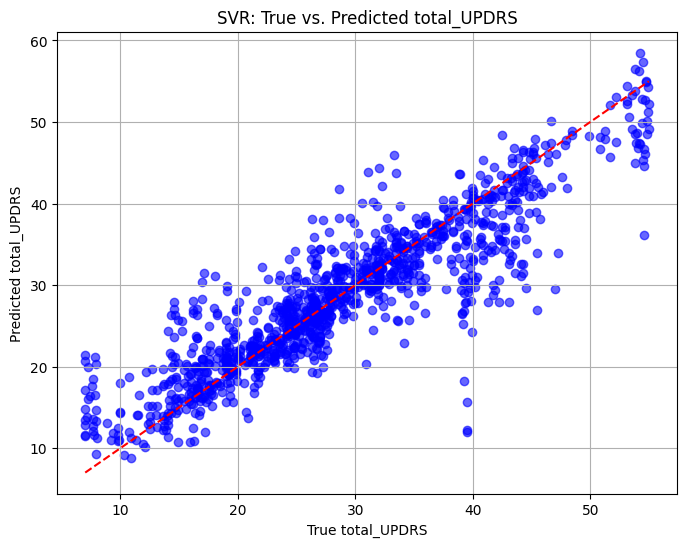

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



X = df.drop(columns=["motor_UPDRS", "total_UPDRS"])  # Features
y = df["total_UPDRS"]  # Target (change to "motor_UPDRS" if needed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "C": [1, 10, 100],
    "epsilon": [0.01, 0.1, 1],
    "gamma": ['scale', 'auto']
}

# Create SVR model and grid search
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

# Evaluate
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

import matplotlib.pyplot as plt

# plot predicted versus true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # y = x line
plt.xlabel("True total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("SVR: True vs. Predicted total_UPDRS")
plt.grid(True)
plt.show()

